# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Chloé Court

## Imports

Please do **not** import any other library.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [57]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [58]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [59]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [60]:
regions = list(df.region.unique())

In [61]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [62]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [63]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [64]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

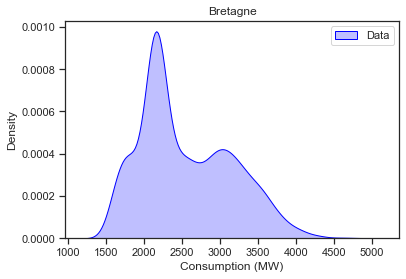

In [65]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

----
**Estimator for the mean :**

$ \begin{align} 
E(\hat{\mu}(X_1)) &= E(\frac{1}{n}\sum_{i=1}^n X_i)\nonumber\\
&=\frac{1}{n}\sum_{i=1}^n E(X_i)\nonumber\\
&=E(X_1)=\mu\nonumber
\end{align}
$

$\quad$ -> The mean is unbiased.

**Estimator for the variance :**

$ \begin{align} 
E(\hat{\sigma^2}(X_1)) &= E(\frac 1 {n-1}\sum_{i=1}^n (X_i - \hat \mu)^2)\nonumber\\
&=\frac 1 {n-1}\sum_{i=1}^nE((X_i - \hat \mu)^2)\nonumber\\
&=\frac n {n-1}E(X_1^2-2\hat{\mu}X_1+\hat{\mu^2})\nonumber\\
&=\frac n {n-1}(E(X_1^2)-\frac 2 n E(\sum_{i=1}^n X_iX_1)+\frac 1 n^2 E((\sum_{i=1}^n X_i)^2))\nonumber\\
&=\frac n {n-1}(E(X_1^2)-\frac 2 n (E(X_1^2)+(n-1)E(X_1)^2) + \frac 1 {n^2} \underbrace{E\left(\sum_{i=1}^n X_i^2 + 2\sum_{i\neq j} X_iX_j\right)}_{= nE(X_1^2)+2E(X_1)^2}
)\nonumber\\
&=\frac n {n-1}(E(X_1^2)(1-\frac{2}{n}+\frac{1}{n})+E(X_1)^2(\frac{2}{n^2}-\frac{2(n-1)}{n}))\nonumber\\
&=E(X_1^2)-E(X_1)^2 = \sigma^2\nonumber
\end{align}
$

$\quad$ -> The variance is unbiased.

----

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [66]:
def get_properties(df_region):
    mean=0
    std=0
    n = len(df_region)
    for i in range(n):
        mean += df_region["consumption"].values[i]
    mean/=n
    for i in range(n):
        std += (df_region["consumption"].values[i]-mean)**2
    return(mean, np.sqrt(1/(n-1)*std), n)

print("The value of the mean using the estimator is :", get_properties(df_region)[0])
print("The value of the standard deviation using the estimator is :",  get_properties(df_region)[1])

The value of the mean using the estimator is : 2546.536155666579
The value of the standard deviation using the estimator is : 604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

Text(0, 0.5, 'Density')

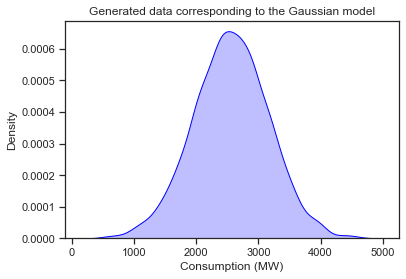

In [67]:
mean, std, n = get_properties(df_region)
x = np.linspace(0,11500, n)
generated_data = norm.rvs(loc=mean, scale=std, size=n)

sns.kdeplot(data=generated_data, label="Generated Data", color='blue', fill=True)

plt.title('Generated data corresponding to the Gaussian model')
plt.xlabel('Consumption (MW)')
plt.ylabel('Density')

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

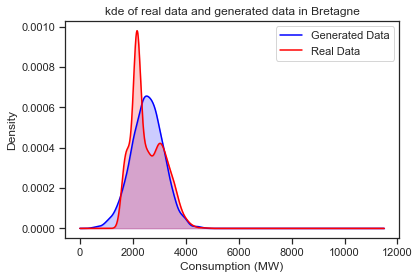

In [68]:
def plot_kde(real_data, generated_data, title):
    kde_generated = gaussian_kde(generated_data)
    kde_real = gaussian_kde(real_data)
    
    plt.plot(x, kde_generated(x),label="Generated Data", color='blue')
    plt.fill_between(x, kde_generated(x), alpha=0.2, color='blue')
    
    plt.plot(x, kde_real(x),label="Real Data", color='red')
    plt.fill_between(x, kde_real(x), alpha=0.2, color='red')

    plt.xlabel('Consumption (MW)')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.show()


plot_kde(df_region["consumption"], generated_data, 'kde of real data and generated data in Bretagne')

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [69]:
def get_df_region_winter(df_region):
    df_region['date'] = pd.to_datetime(df['date'])
    mask = ((df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)) |((df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21)) | ((df_region['date'].dt.month == 1) | (df_region['date'].dt.month == 2))
    return(df_region[mask])

In [70]:
#updating the model :
df_region_winter = get_df_region_winter(df_region)
real_winter_data = df_region_winter["consumption"]
winter_mean, winter_std, n_winter = get_properties(df_region_winter)

winter_data = norm.rvs(loc=winter_mean, scale=winter_std, size=n_winter)

<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])


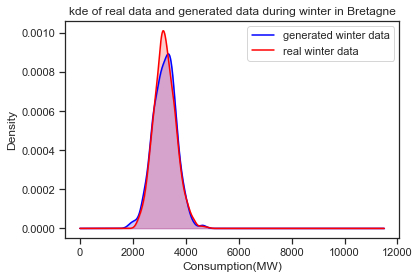

In [71]:
x_winter = np.linspace(0, 11500, n_winter)

kde= gaussian_kde(winter_data)
plt.plot(x_winter, kde(x_winter), label='generated winter data', color = 'blue')
plt.fill_between(x_winter, kde(x_winter), alpha = 0.2,color = 'blue')

kde=gaussian_kde(real_winter_data)
plt.plot(x_winter,kde(x_winter),label='real winter data', color = 'red')
plt.fill_between(x_winter, kde(x_winter), alpha = 0.2, color = 'red')
plt.xlabel('Consumption(MW)')
plt.ylabel('Density')
plt.title('kde of real data and generated data during winter in Bretagne')
plt.legend()

6. In which case the Gaussian model seems more appropriate?

> The gaussian model is much more appropriate during the winter than considering the whole year.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

----
**Show that $d(f,g)\in [0,1]$ :**
$
\begin{align}
d(f,g) & = \frac{1}{2} \int |f(x) - g(x)| \, dx \nonumber\\
& \leq \frac{1}{2} \int (|f(x)| + |-g(x)|) \, dx \quad \text{(by triangle inequality)} \notag\nonumber\\
&= \frac{1}{2} \int (f(x) + g(x)) \, dx \quad \text{(because f and g are positive (pdf property))}\nonumber\\
&= \frac{1}{2} \int f(x) \, dx + \frac{1}{2} \int g(x) \, dx \nonumber\\
&= 1\quad \text{(f and g pdf)}\nonumber
\end{align}
$  

$\quad$ By the positivity of the integral, we can also assert that : $d(f,g)\geq 0$  

$\quad$ Consequently, $\boxed{d(f,g)\in [0,1]}$


**Show that $d(f,g)=0$ if and only if $f=g$ almost everywhere:**

$\quad$ If $f=g$ almost everywhere, it is clear that $d(f,g)=0$.  

$\quad$ If $d(f,g)=0$, as $|f-g|$ is continuous ans positive, $|f-g|=0$ almost everywhere, so $f=g$ almost everywhere.

**Show that $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports if the intersection of :**

$\quad$ If f and g have disjoint supports, $d(f,g)=\frac 1 2 \int_{\text{Supp}(f)}f(x)dx + \frac 1 2 \int_{\text{Supp}(g)}g(x)dx = 1$ because f and g are pdf.  

$\quad$ If $d(f,g)=1$, it means that the triangle inequality is an equality. This is only possible if $f(x)$ and $-g(x)$ have the same sign, which is not true if both of them are not null. So at least one of them is null, and it proves that f and g have disjoint supports.

----

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [72]:
mean, std, n = get_properties(df_region)
x=np.linspace(0, 11500, n)

kde = gaussian_kde(df_region["consumption"])
pdf = norm.pdf(x, mean, std)

S0 = np.trapz(np.abs(kde(x) - pdf), x)
print('The dissimilarity between the kde of real data and the density of the Gaussian model is :', S0/2)

The dissimilarity between the kde of real data and the density of the Gaussian model is : 0.17912911900498796


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [73]:
kde = gaussian_kde(real_winter_data)
winter_mean, winter_std, n_winter = get_properties(df_region_winter)
x_winter = np.linspace(0, 11500, n_winter)
pdf = norm.pdf(x, winter_mean, winter_std)

S1 = np.trapz(np.abs(kde(x) - pdf), x)
print('The dissimilarity between the kde of real data in winter and the density of the Gaussian model (also in winter) is :', S1/2)

The dissimilarity between the kde of real data in winter and the density of the Gaussian model (also in winter) is : 0.030938119191202887


> The result is coherent with the conclusion of part A. Indeed, the data is more similar to the Gaussian model in winter than during the whole year.

4. Do the same for all regions. Give the result as a single dataframe.

In [74]:
df_dissimilarity = pd.DataFrame(columns=['region', 'dissimilarity', 'winter dissimilarity'])

for i in range(0, len(regions)):
    df_region = df[df.region == regions[i]]
    #all year
    mean, std, n = get_properties(df_region)
    x= np.linspace(0, 11500, n)
    
    kde = gaussian_kde(df_region["consumption"])
    pdf = norm.pdf(x, mean, std)
    S0 = np.trapz(np.abs(kde(x) - pdf), x)

    #during winter
    df_region_winter = get_df_region_winter(df_region)

    kde=gaussian_kde(df_region_winter["consumption"])
    winter_mean, winter_std, n_winter = get_properties(df_region_winter)
    x_winter= np.linspace(0, 11500, n_winter)

    pdf = norm.pdf(x_winter, winter_mean, winter_std)
    S1 = np.trapz(np.abs(kde(x_winter) - pdf), x_winter)
    
    df_dissimilarity.loc[i]=[regions[i], 0.5*S0, 0.5*S1]

df_dissimilarity

<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])
<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])
<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,region,dissimilarity,winter dissimilarity
0,Auvergne-Rhône-Alpes,0.168271,0.036305
1,Bourgogne-Franche-Comté,0.124553,0.037447
2,Bretagne,0.179129,0.030942
3,Centre-Val de Loire,0.194058,0.043139
4,Grand Est,0.115045,0.039064
5,Hauts-de-France,0.131456,0.027517
6,Normandie,0.174286,0.042746
7,Nouvelle-Aquitaine,0.217600,0.053762
8,Occitanie,0.222532,0.063293
9,Pays de la Loire,0.169134,0.039185


5. Which region is best fitted by a Gaussian model in winter?

> The region best fitted by a Gaussian model in winter is Hauts-de-France.

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])


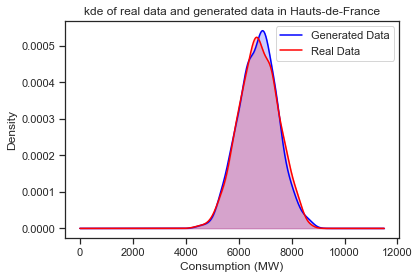

In [75]:
df_region = df[df.region == 'Hauts-de-France']
df_region_winter = get_df_region_winter(df_region)

winter_mean, winter_std, n_winter = get_properties(df_region_winter)
x_winter = np.linspace(0, 11500, n_winter)
generated_data = norm.rvs(loc=winter_mean, scale=winter_std, size=n_winter)

plot_kde(df_region_winter["consumption"], generated_data, 'kde of real data and generated data in Hauts-de-France')

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0 = 3500$ MW and standard deviation $\sigma _0 = 500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu _0$, $\sigma _0$ and the $n$ observations $x_1,\ldots,x_n$.

----
**The posterior distribution is :** 

$\begin{align}
\pi(\mu | x_1, \ldots, x_n) &\propto p(x_1, \ldots, x_n | \mu) \times \pi(\mu) \nonumber\\
&= \left(\frac{1}{\sigma^2\sqrt{2\pi}}\right)^n e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2} \times \frac{1}{\sigma_0^2\sqrt{2\pi}} e^{-\frac{1}{2\sigma_0^2}(\mu-\mu_0)^2}\nonumber\\
&\propto e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2 - \frac{1}{2\sigma_0^2}(\mu-\mu_0)^2}\nonumber\\
&\propto e^{-\frac{1}{2}(\mu^2(\frac n {\sigma^2} + \frac 1 {\sigma_0^2}) - 2\mu(\frac1 {\sigma^2}\sum_{i=1}^n x_i - \frac{\mu_0}{\sigma_0^2}))}\nonumber\\
\end{align}
$

**The posterior distribution is a Gaussian distribution with mean :**
$\boxed{\frac{\frac1 {\sigma^2}\sum_{i=1}^n x_i + \frac{\mu_0}{\sigma_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}}$ 
**and variance :**
 $\boxed{\frac 1 {\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}}$

----

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [76]:
df_region = df[df.region == 'Bretagne']
df_region_winter = get_df_region_winter(df_region)

df_parameters = pd.DataFrame(columns=['year', 'mean', 'variance'])

for year in range(2012, 2023):
    df_region_winter['date'] = pd.to_datetime(df['date'])
    mask = ((df_region_winter['date'].dt.year == year) & (df_region['date'].dt.month == 12))|((df_region_winter['date'].dt.year == year + 1)&((df_region['date'].dt.month <= 3)))
    df_region_winter_year = df_region_winter[mask]

    n = get_properties(df_region_winter_year)[2]

    S = df_region_winter_year["consumption"].sum().astype(int)

    mean = (1/400**2 *S + 3500/500**2)/(n/400**2+1/500**2)
    variance = 1/(n/400**2+1/500**2)
    df_parameters.loc[year-2012]=[str(year) + '-' + str(year+1), str(mean), str(variance)]

df_parameters

<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])
<ipython-input-76-691d2ddfa899>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_winter['date'] = pd.to_datetime(df['date'])
<ipython-input-76-691d2ddfa899>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_region_winter_year = df_region_winter[mask]
<ipython-input-76-691d2ddfa899>:7: SettingWithCopyWarning: 
A value is trying to be set o

,year,mean,variance
0,2012-2013,3395.1760912698414,1984.126984126984
1,2013-2014,3095.1345984112977,1765.2250661959401
2,2014-2015,3229.578552515446,1765.2250661959401
3,2015-2016,3133.762549105194,1745.9624618070711
4,2016-2017,3275.816416593116,1765.2250661959401
5,2017-2018,3328.695939982348,1765.2250661959401
6,2018-2019,3179.9315975286854,1765.2250661959401
7,2019-2020,3124.061545176779,1745.9624618070711
8,2020-2021,3360.6575463371587,1765.2250661959401
9,2021-2022,3216.0414827890563,1765.2250661959401


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

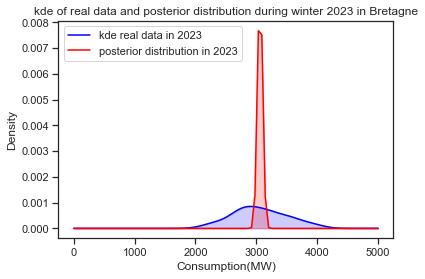

In [77]:
x=np.linspace(0, 5000, n)
pdf = norm.pdf(x, loc=mean, scale=np.sqrt(variance))
real_data = df_region_winter_year["consumption"]

kde_real = gaussian_kde(real_data)

plt.plot(x, kde_real(x), label = 'kde real data in 2023', color = 'blue')
plt.fill_between(x, kde_real(x), alpha = 0.2, color = 'blue')
plt.plot(x, pdf, label = 'posterior distribution in 2023', color = 'red')
plt.fill_between(x, pdf, alpha = 0.2,color = 'red')

plt.xlabel('Consumption(MW)')
plt.ylabel('Density')
plt.title('kde of real data and posterior distribution during winter 2023 in Bretagne')
plt.legend()

4. Discuss the results, comparing to those obtained in part A.

> The posterior distribution shows the probability of the mean considering a prior. The results are consistent with the real data. This is another way than in part A to obtain the mean (in part A we calculated it directly with the data). Both methods are convincing.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

----
$\theta_0=250000 MW^2$  
$\theta_1=160000 MW^2$  

We want to test $H_0=\left\{\theta_0\right\}$ against $H_1=\left\{\theta_1\right\}$

Likelihood ratio :
$\begin{align}
\frac {p_1(x)}{p_0(x)} 
&\propto \frac {e^{-\frac{1}{2\theta_1}\sum_{i=1}^n (x_i - \mu)^2 }}{e^{-\frac{1}{2\theta_0}\sum_{i=1}^n (x_i - \mu)^2 }}\nonumber\\
&\propto e^{\frac{1}{2}(\frac 1 {\theta_0} - \frac 1 \theta_1)\sum_{i=1}^n (x_i - \mu)^2 }\nonumber
\end{align}
$

Let's pose $S = \sum_{i=1}^n (x_i - \mu)^2$  

Since $\theta_0 > \theta_1$, the test is given by :  
$$\boxed{\delta(x) = 1_{S<c}}\quad\text{with some constant c>0}$$  

We have $S \sim \theta Z$ with $Z \sim \chi^2(n)$  

So, $\alpha=P_0(S<c)=P_0(\theta Z<c)=P_0(Z<\frac c \theta)$

We get, using the quantile function $Q$ of the $\chi^2(n)$ distribution : $c = \theta_0Q(\alpha)$

If $c<S$, the hypothesis is valid, otherwise it is not.

----

2. Provide the result of this test for $\alpha=1\%$.

In [78]:
c = 500**2 * chi2.ppf(0.01, n)
S = 0

for val in df_region_winter_year["consumption"]:
    S += (val-3200)**2

print("S =", S)
print("c =", c)

if(S>c):
    print("The hypothesis is valid.")
else:
    print("The hypothesis is not valid.")

S = 18736029
c = 15438519.750425365
The hypothesis is valid.


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])
<ipython-input-69-2dc43b487c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df['date'])
<ipython-input-79-014c7d175e1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

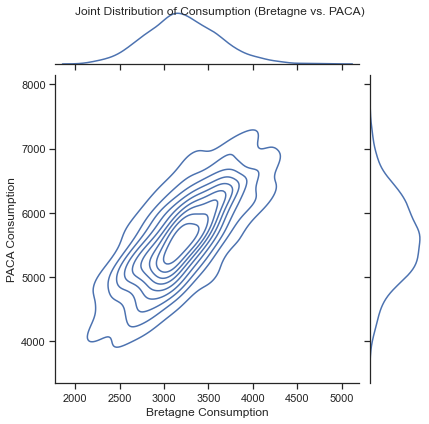

In [79]:
df_region_Bretagne = df[df['region'] == "Bretagne"] 
df_region_winter_Bretagne = get_df_region_winter(df_region_Bretagne)
df_region_Provence = df[df['region'] == "Provence-Alpes-Côte d'Azur"]
df_region_winter_Provence = get_df_region_winter(df_region_Provence)

df_region_winter_Bretagne['date'] = pd.to_datetime(df_region_winter_Bretagne['date'])
df_region_winter_Provence['date'] = pd.to_datetime(df_region_winter_Provence['date'])
result_df = pd.merge(df_region_winter_Bretagne, df_region_winter_Provence, on="date", how="inner")

sns.set_theme(style="ticks")

g = sns.jointplot(
    data=result_df,
    x="consumption_x", y="consumption_y",
    kind="kde"
)
g.set_axis_labels("Bretagne Consumption", "PACA Consumption")
g.fig.suptitle("Joint Distribution of Consumption (Bretagne vs. PACA)", fontsize=12)

plt.show()

2. Do you think the power consumption in these two regions is independent?

> I think that the power consumption of these two regions are not independant, as we see in the plot above that giving a value of the PACA consumption we can tell approximatively the value of the Bretagne consumption.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

----
$\quad\chi^2$-test for independance :  
$$\delta(x)= 1_{\left\{T(x)>c\right\}}$$

$\quad$ with : $$T(x)=\sum\limits_{i,j}\frac{(N_{ij}-\frac{N_iN_j}{n})^2}{\frac{N_iN_j}{n}}$$

$\quad$ For a level $\alpha$ : $$\boxed{c=Q(1-\alpha)}$$

$\quad$ with Q the quantile function of the $\chi^2((2-1)(n-1))=\chi^2(n-1)$ distribution (with n the number of days of the distribution).  

----

4. Give the result of this test for $\alpha=1\%$. 

In [80]:
df_region_winter_BrePro = pd.concat([df_region_winter_Bretagne, df_region_winter_Provence]).groupby('date').sum().reset_index()
n=get_properties(df_region_winter_BrePro)[2]

c = chi2.ppf(0.99, n-1)

T = 0
bre_tot_cons = df_region_winter_Bretagne["consumption"].sum().astype(int)
pro_tot_cons = df_region_winter_Provence["consumption"].sum().astype(int)
brepro_tot_cons = df_region_winter_BrePro["consumption"].sum().astype(int)

for day in df_region_winter_BrePro['date']:
    bretagne_consumption = df_region_winter_Bretagne.loc[df_region_winter_Bretagne['date'] == day, 'consumption'].values[0]
    provence_consumption = df_region_winter_Provence.loc[df_region_winter_Provence['date'] == day, 'consumption'].values[0]
    brepro_consumption = df_region_winter_BrePro.loc[df_region_winter_BrePro['date'] == day, 'consumption'].values[0]

    T += ((bretagne_consumption - brepro_consumption*bre_tot_cons/brepro_tot_cons) ** 2) / (brepro_consumption*bre_tot_cons/brepro_tot_cons) + ((provence_consumption - brepro_consumption*pro_tot_cons/brepro_tot_cons) ** 2) / (brepro_consumption*pro_tot_cons/brepro_tot_cons)

print("T =", T)
print("c =", c)
if(T>c):
    print("The consumption of Bretagne and Provence-Alpes-Côte d'Azur are not independant.")
else:
    print("The consumption of Bretagne and Provence-Alpes-Côte d'Azur are independant.")

T = 16442.45517172824
c = 1086.9758002558094
The consumption of Bretagne and Provence-Alpes-Côte d'Azur are not independant.


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

----
Let's pose $X \sim \mathcal{N}(\mu, \sigma^2)$, $\quad\overline{X} = \frac 1 n \sum_{i=1}^n X_i\quad$ and $\quad V=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2$

Then, $\overline{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}n)$  


$\quad$ Let $Z$ be such as $Z = \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$. By construction, $Z \sim \mathcal{N}(0, 1)$.  

$\quad$ Let $Y$ be such as $Y = \frac {V(n-1)}{\sigma^2}$. By construction, $Y \sim \chi^2(n-1)$

So, $T := \frac Z {\sqrt{\frac Y {n-1}}} = \frac {\overline{X}-\mu}{\sqrt{\frac V {n}}} \sim St(n-1)$  

Let $Q$ be the quantile function of T, $c=Q(1-\frac \alpha 2)$.  

$\quad$ We have :
$$ P(T \in [-c, c]) = 1 - \alpha
$$
$\quad$ That is :
$$\forall \mu, P_{\mu}(\mu \in [\overline{X} - c\sqrt{\frac {n}{V}},\overline{X} + c\sqrt{\frac {n}{V}}]) =  1 - \alpha
$$

In [81]:
n = get_properties(df_region_winter_Bretagne)[2]
c = t.ppf(1-0.05/2, n-1)

X_bar = 0
V = 0
for i in range(n):
    X_bar += df_region_winter_Bretagne['consumption'].values[i]
X_bar /= n

for i in range(n):
    V += (df_region_winter_Bretagne['consumption'].values[i]-X_bar)**2
V /= (n-1)

lower_bound = X_bar - c*np.sqrt(n/V)
upper_bound = X_bar + c*np.sqrt(n/V)

print("The interval at level 95% for the mean power consumption is: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

The interval at level 95% for the mean power consumption is: [3214.03, 3214.33]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

> Since 3100MW is not in the confidence interval, the null hypothesis with the mean consumption equal to 3100MW can not be accepted.